In [5]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.special as sp
import scipy.optimize as opt

def normalized_cutoff_freq(n, ratio_b_a, Eps, p, q, r, s):
    
    # DEFINING THE THREE MAIN FUNCTIONS 
    
    # Define the function to be plotted: TO FIND THE Y VALUES
    def cutoff_y_value(x):
        y = np.sqrt(Eps)*x  # now, this is the modified y when the propogation constant is zero.
        return y

    # Define the function to be plotted (right hand side)
    def cutoff_rhs_function(x):

        y = np.sqrt(Eps)*x

        rhsarr =((1/(x**2))-(Eps/(y**2)))*((1/(x**2))-(1/(y**2)))

        return rhsarr

    def cutoff_lhs_function(x): 

        y = np.sqrt(Eps)*x

        rmori = ((sp.yn(n, ((ratio_b_a)*y)))*(sp.jn(n, y)))-((sp.jn(n, ((ratio_b_a)*y)))*(sp.yn(n, y)))
        rmder = ((sp.yn(n, ((ratio_b_a)*y)))*(sp.jvp(n, y)))-((sp.jn(n, ((ratio_b_a)*y)))*(sp.yvp(n, y)))
        smori = ((sp.yvp(n, ((ratio_b_a)*y)))*(sp.jn(n, y)))-((sp.jvp(n, ((ratio_b_a)*y)))*(sp.yn(n, y)))
        smder = ((sp.yvp(n, ((ratio_b_a)*y)))*(sp.jvp(n, y)))-((sp.jvp(n, ((ratio_b_a)*y)))*(sp.yvp(n, y)))

        lhsarr = (((sp.jvp(n, x))/(x*sp.jn(n, x)))-((Eps*rmder)/(y*rmori)))*(((sp.jvp(n, x))/(x*sp.jn(n, x)))-((smder)/(y*smori)))

        return lhsarr
    
    # THE GRAPHS TO BE PLOTTED 
    
    x_array = np.linspace(0, 6, 100)
    y_value_rhs = cutoff_rhs_function(x_array)
    y_value_lhs = cutoff_lhs_function(x_array)
    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 8), dpi=300)

    # Plot the first function
    ax.plot(x_array, y_value_rhs, label='Right hand side')

    # Plot the second function
    ax.plot(x_array, y_value_lhs, label='Left hand side')

    # Add labels and a title
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('General Equation')

    # Add a legend
    ax.legend()

    # Limit the y-axis values
    ax.set_ylim(-2, 6)

    # Add a grid to the plot
    ax.grid(True, linestyle='-.', color='grey')

    # Show the plot
    plt.show()
    
    # 
    
    # TO FIND THE ROOTS
    
    x0 = np.array([p, q, r, s]) # initial guesses (looking at the graph)

    # Define the difference between the two functions as a function of x
    def func_diff(x):
        #return cutoff_lhs_function(x)- cutoff_rhs_function(x)
        return cutoff_lhs_function(x) # since the rhs accounts for zero values, we can simply neglect that.

    # Use the root function to find the root of the difference
    root = opt.root(func_diff, x0)

    x_root = root.x
    
    # TO FIND THE NORMALIZED WAVELENGTHS 
    
    normwavelen = (np.pi/x_root)*(1/ratio_b_a) # this is using the equation
    
    # RESULTS
    
    print('FINAL RESULTS: --------')
    print('The order of Bessel Function: ', n)
    print('Ratio b/a: ',ratio_b_a)
    print('Dielectric Constant: ',Eps)    
    print('X values(roots): ',root.x)
    print('Normalized wavelengths (lambda/2b): ', normwavelen)

<ipython-input-1-71394804cf29>:22: RuntimeWarning: divide by zero encountered in true_divide
  rhsarr =((1/(x**2))-(Eps/(y**2)))*((1/(x**2))-(1/(y**2)))
<ipython-input-1-71394804cf29>:22: RuntimeWarning: invalid value encountered in subtract
  rhsarr =((1/(x**2))-(Eps/(y**2)))*((1/(x**2))-(1/(y**2)))
<ipython-input-1-71394804cf29>:36: RuntimeWarning: invalid value encountered in multiply
  rmori = ((sp.yn(n, ((ratab)*y)))*(sp.jn(n, y)))-((sp.jn(n, ((ratab)*y)))*(sp.yn(n, y)))
C:\Users\Maleesh Rathnasiri\anaconda3\lib\site-packages\scipy\special\_basic.py:609: RuntimeWarning: invalid value encountered in add
  s += p*L(v-n + i*2, z)
<ipython-input-1-71394804cf29>:41: RuntimeWarning: divide by zero encountered in true_divide
  lhsarr = (((sp.jvp(n, x))/(x*sp.jn(n, x)))-((Eps*rmder)/(y*rmori)))*(((sp.jvp(n, x))/(x*sp.jn(n, x)))-((smder)/(y*smori)))


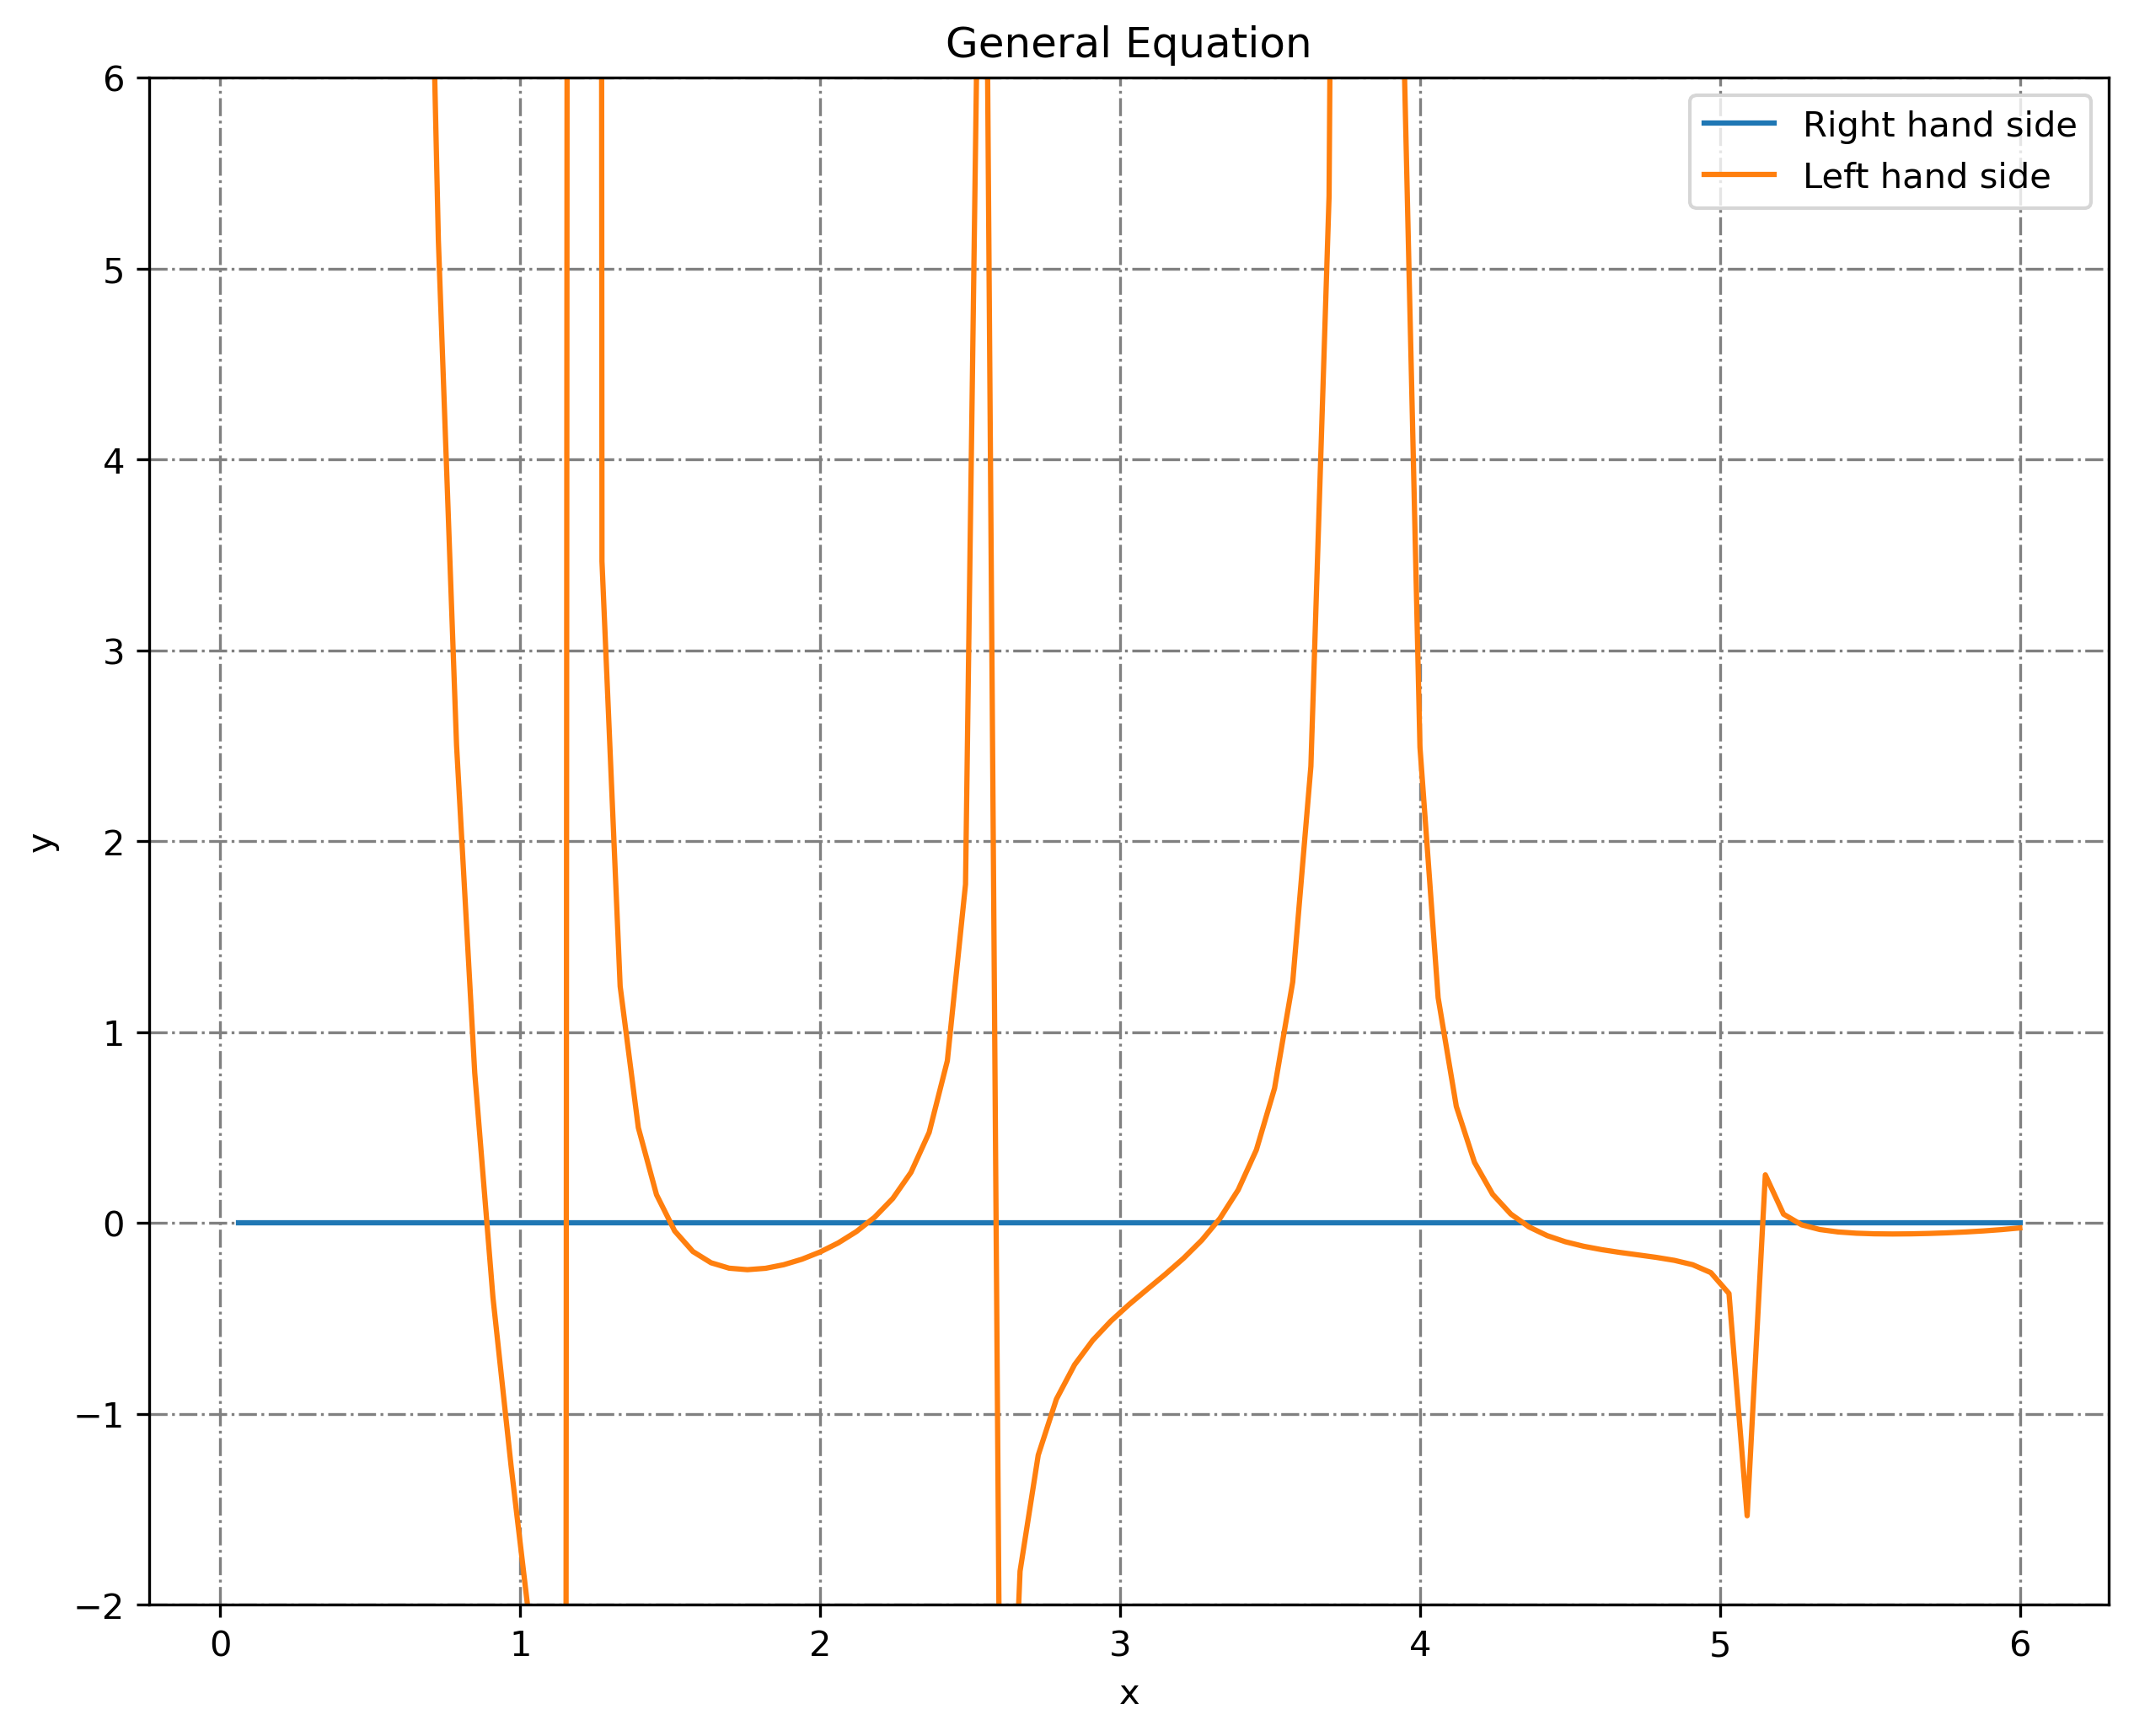

FINAL RESULTS: --------
The order of Bessel Function:  1
Ratio b/a:  1.499250375
Dielectric Constant:  6.1
X values(roots):  [0.88673951 1.49833029 2.15945078 3.32165496]
Normalized wavelengths (lambda/2b):  [2.36308664 1.39851828 0.97035891 0.63084286]


In [6]:
n = 1
ratab = 1.499250375
Eps = 6.1
p = 0.9
q = 1.3
r = 2.1
s = 3

norcutfreq(n, ratab, Eps, p, q, r, s)